In [1]:
import tensorflow as tf

model = tf.keras.models.load_model('saved_model\\0-dense---32-nodes---1-conv---accuracy-95_08')# staviti na putanju foldera koji sadrzi model
model.summary()# da proverimo da li je model dobro ucitan/sacuvan

KATEGORIJE = ['ZDRAV', 'VIRUS', 'BAKTERIJA', 'STREPTOCOCCUS', 'COVID-19', 'ARDS', 'SARS']# menjanje ovog niza ce uticati na ispis odgovora
IMG_SIZE = 400# menjati samo ako pri promeni model koji to zahteva (svi modeli koji su okaceni na git zahtevaju IMG_SIZE 400)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 398, 398, 32)      320       
_________________________________________________________________
activation (Activation)      (None, 398, 398, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 199, 199, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 1267232)           0         
_________________________________________________________________
dense (Dense)                (None, 7)                 8870631   
Total params: 8,870,951
Trainable params: 8,870,951
Non-trainable params: 0
_________________________________________________________________


In [2]:
IMG_LOCATION = 'C:/Users/User/Desktop/v.jpg'# slika koju testiramo

Model je misli da je u pitanju VIRUS


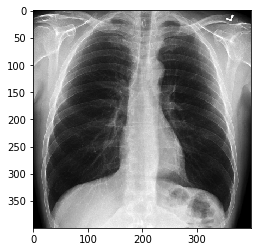

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

test_slika = cv2.imread(IMG_LOCATION, cv2.IMREAD_GRAYSCALE)
test_slika = cv2.resize(test_slika, dsize=(IMG_SIZE, IMG_SIZE), interpolation=cv2.INTER_CUBIC)
plt.imshow(test_slika, cmap='gray')

test_slika = np.array(test_slika)
test_slika = (np.expand_dims(test_slika, 0))
test_slika = (np.expand_dims(test_slika,-1))

prediction = model.predict(test_slika)
print("Model je misli da je u pitanju {}".format(KATEGORIJE[np.argmax(prediction[0])]))